# CHILDES French: Age vs MLU

In [63]:
import os
import csv
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [64]:
# List of CSV files to process
# mlu_files_50 = []  # Uses _mlu50.csv files
# mlu_files_100 = []  # Uses _mlu100.csv files
mlu_files_all = ['Anae_mlu.csv', 'Anais_mlu.csv', 'Anne_mlu.csv', 'Antoine_mlu.csv', 'Champaud_mlu.csv', 'Geneva_mlu.csv', 'Lea_mlu.csv', 'Leonard_mlu.csv', 'Leveille_mlu.csv', 'Madeleine_mlu.csv', 'Marie_mlu.csv', 'Marilyn_mlu.csv', 'Max_mlu.csv', 'Nathan_mlu.csv', 'Theotime_mlu.csv', 'Theophile_mlu.csv']  # Uses _mlu.csv files

# Initialize a 2D array to store Spearman's rho values for each CSV file
# spearman_rhos_50 = []
# spearman_rhos_100 = []
spearman_rhos_all = []

# Load the original _mlu.csv files to get ages (the other _mlu.csv files do not contain the corresponding ages for each transcript)
age_files = ['Anae_mlu.csv', 'Anais_mlu.csv', 'Anne_mlu.csv', 'Antoine_mlu.csv', 'Champaud_mlu.csv', 'Geneva_mlu.csv', 'Lea_mlu.csv', 'Leonard_mlu.csv', 'Leveille_mlu.csv', 'Madeleine_mlu.csv', 'Marie_mlu.csv', 'Marilyn_mlu.csv', 'Max_mlu.csv', 'Nathan_mlu.csv', 'Theotime_mlu.csv', 'Theophile_mlu.csv']

In [65]:
def age_in_months(age_str):
    parts = age_str.split(';')
    if len(parts) == 2:  # Example Format: "2;11.28", "2;05.", or "3;"
        years = int(parts[0])
        months_and_days = parts[1].split('.')
        
        # Handle cases where days are not provided
        if months_and_days[0] == '':
            months = 0  # Assume 00 months if no months are provided
        else:
            months = float(months_and_days[0])
        
        # Check if the month format ends with a dot, indicating missing days
        if len(months_and_days) > 1 and months_and_days[1] == '':
            days = 0  # Assume 00 days if no days are provided
        else:
            days = float(months_and_days[1]) if len(months_and_days) > 1 else 0
        
        months += days / 30  # Keep decimal for days
        return years * 12 + months
    return 0  # Consider raising an error instead of returning 0 for invalid formats

In [66]:
def age_mlu_plots(mlu_files, spearman_rhos, age_files):
    age_data = {}

    for age_file in age_files:
        if os.path.exists(age_file):
            with open(age_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)
                # Store ages in a dictionary with the base filename as the key
                for entry in data:
                    base_filename = entry['File'].split('.')[0]  # Get the base filename
                    age_data[base_filename] = age_in_months(entry['Age'])  # Store the age

    for mlu_file in mlu_files:
        # Check if the file exists before attempting to open it
        if os.path.exists(mlu_file):
            with open(mlu_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)

            # Initialize list to hold chosen transcripts
            chosen_transcripts = []
            transcript_list = []
            time_steps = []  # New list to hold time steps

            # Select the first transcript
            if data:  # Check if there is any data
                first_data = data[0]
                # Extract the base filename to get the corresponding age
                base_filename = first_data['File'].split('.')[0]
                first_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                chosen_transcripts.append((first_age, float(first_data['morphemes/utterances'])))
                transcript_list.append(first_data['File'])  # Collect the first transcript name

                last_chosen_age = first_age

                # Select subsequent transcripts that are at least 1 month apart
                for entry in data[1:]:  # Start from the second transcript
                    base_filename = entry['File'].split('.')[0]
                    current_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                    if current_age - last_chosen_age >= 1:
                        chosen_transcripts.append((current_age, float(entry['morphemes/utterances'])))  # Collect age and morphemes/utterances
                        transcript_list.append(entry['File'])  # Collect the transcript name
                        time_steps.append(current_age - last_chosen_age)  # Calculate time step without rounding
                        last_chosen_age = current_age

            # Plot Age vs Morphemes/Utterances
            ages = [t[0] for t in chosen_transcripts]
            morphemes_utterances = [t[1] for t in chosen_transcripts]

            plt.figure(figsize=(10, 5))
            plt.scatter(ages, morphemes_utterances, marker='o')  # scatter plot
            plt.title(f'Age vs MLU for {mlu_file}')
            plt.xlabel('Age (months)')
            plt.ylabel('MLU (Morphemes/Utterances)')
            # plt.xticks([round(age, 2) for age in ages])  # Set x-ticks to show each month with decimals
            plt.grid()
            plt.show()       

            # Calculate Spearman's rho
            if len(ages) > 1:  # Ensure there are enough data points
                spearman_corr, _ = spearmanr(ages, morphemes_utterances)
                spearman_rhos.append([mlu_file, spearman_corr])  # Store the file name and Spearman's rho value
                print(f"Spearman's rho for {mlu_file}: {spearman_corr:.4f}\n")

            # Print the list of chosen transcripts, converted ages, and time steps
            print(f"Chosen Transcripts for {mlu_file}: \n", transcript_list, "\n")
            print(f"MLU Scores for {mlu_file}: \n", morphemes_utterances, "\n")  # Print the MLU scores
            print(f"Ages for {mlu_file}: \n", ages, "\n")  # Print the converted ages
            print(f"Time Steps for {mlu_file}: \n", time_steps, "\n")  # Print the time steps

## Age vs MLU (50 Utterances)

In [67]:
age_mlu_plots(mlu_files_50, spearman_rhos_50, age_files)

## Age vs MLU (100 Utterances)

In [68]:
age_mlu_plots(mlu_files_100, spearman_rhos_100, age_files)

## Age vs MLU (All Utterances)

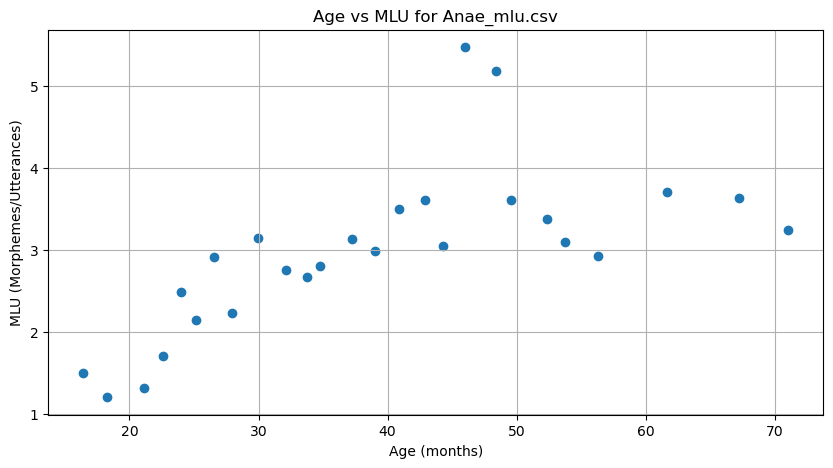

Spearman's rho for Anae_mlu.csv: 0.8181

Chosen Transcripts for Anae_mlu.csv: 
 ['010413.cha', '010608.cha', '010904.cha', '011017.cha', '020000.cha', '020105.cha', '020216.cha', '020329.cha', '020529.cha', '020804.cha', '020923.cha', '021023.cha', '030107.cha', '030300.cha', '030427.cha', '030626.cha', '030809.cha', '031000.cha', '040012.cha', '040117.cha', '040410.cha', '040523.cha', '040808.cha', '050120.cha', '050706.cha', '051030.cha'] 

MLU Scores for Anae_mlu.csv: 
 [1.494, 1.204, 1.318, 1.705, 2.485, 2.139, 2.908, 2.233, 3.146, 2.757, 2.671, 2.798, 3.137, 2.989, 3.492, 3.611, 3.048, 5.468, 5.18, 3.607, 3.376, 3.091, 2.928, 3.704, 3.629, 3.246] 

Ages for Anae_mlu.csv: 
 [16.433333333333334, 18.266666666666666, 21.133333333333333, 22.566666666666666, 24.0, 25.166666666666668, 26.53333333333333, 27.96666666666667, 29.96666666666667, 32.13333333333333, 33.766666666666666, 34.766666666666666, 37.233333333333334, 39.0, 40.9, 42.86666666666667, 44.3, 46.0, 48.4, 49.56666666666667, 52

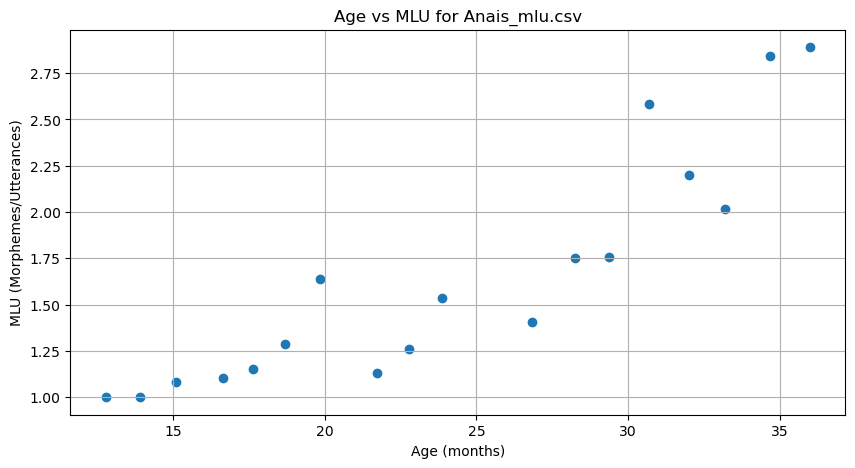

Spearman's rho for Anais_mlu.csv: 0.9520

Chosen Transcripts for Anais_mlu.csv: 
 ['10023a.cha', '10127a.cha', '10303a.cha', '10419a.cha', '10519a.cha', '10621a.cha', '10725a.cha', '10922a.cha', '11023a.cha', '11126a.cha', '20225a.cha', '20407a.cha', '20511a.cha', '20621a.cha', '20800a.cha', '20906a.cha', '21020a.cha', '30000a.cha'] 

MLU Scores for Anais_mlu.csv: 
 [1.0, 1.0, 1.083, 1.103, 1.152, 1.29, 1.64, 1.13, 1.258, 1.534, 1.405, 1.752, 1.757, 2.581, 2.198, 2.019, 2.843, 2.89] 

Ages for Anais_mlu.csv: 
 [12.766666666666667, 13.9, 15.1, 16.633333333333333, 17.633333333333333, 18.7, 19.833333333333332, 21.733333333333334, 22.766666666666666, 23.866666666666667, 26.833333333333332, 28.233333333333334, 29.366666666666667, 30.7, 32.0, 33.2, 34.666666666666664, 36.0] 

Time Steps for Anais_mlu.csv: 
 [1.1333333333333329, 1.1999999999999993, 1.5333333333333332, 1.0, 1.0666666666666664, 1.1333333333333329, 1.9000000000000021, 1.0333333333333314, 1.1000000000000014, 2.966666666666665, 1.

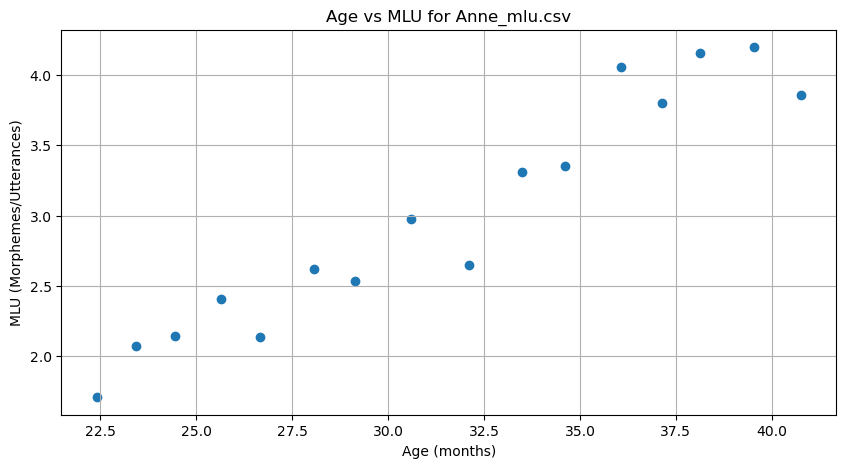

Spearman's rho for Anne_mlu.csv: 0.9618

Chosen Transcripts for Anne_mlu.csv: 
 ['011012.cha', '011113.cha', '020013.cha', '020119.cha', '020220.cha', '020402.cha', '020504.cha', '020618.cha', '020803.cha', '020915.cha', '021018.cha', '030002.cha', '030104.cha', '030204.cha', '030316.cha', '030423.cha'] 

MLU Scores for Anne_mlu.csv: 
 [1.71, 2.073, 2.143, 2.406, 2.135, 2.619, 2.534, 2.976, 2.652, 3.31, 3.355, 4.053, 3.799, 4.155, 4.195, 3.854] 

Ages for Anne_mlu.csv: 
 [22.4, 23.433333333333334, 24.433333333333334, 25.633333333333333, 26.666666666666668, 28.066666666666666, 29.133333333333333, 30.6, 32.1, 33.5, 34.6, 36.06666666666667, 37.13333333333333, 38.13333333333333, 39.53333333333333, 40.766666666666666] 

Time Steps for Anne_mlu.csv: 
 [1.033333333333335, 1.0, 1.1999999999999993, 1.033333333333335, 1.3999999999999986, 1.0666666666666664, 1.4666666666666686, 1.5, 1.3999999999999986, 1.1000000000000014, 1.4666666666666686, 1.0666666666666629, 1.0, 1.3999999999999986, 1.23333333

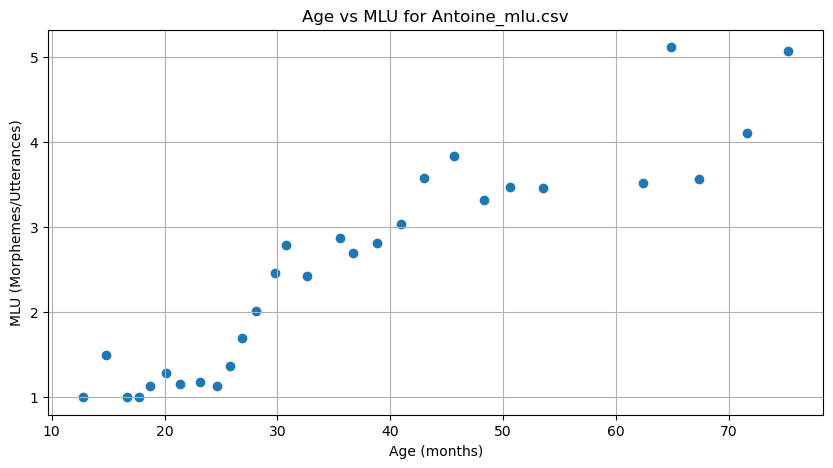

Spearman's rho for Antoine_mlu.csv: 0.9507

Chosen Transcripts for Antoine_mlu.csv: 
 ['010024.cha', '010224.cha', '010419.cha', '010521.cha', '010622.cha', '010805.cha', '010911.cha', '011104.cha', '020020.cha', '020123.cha', '020227.cha', '020403.cha', '020524.cha', '020624.cha', '020820.cha', '021116.cha', '030021.cha', '030224.cha', '030500.cha', '030701.cha', '030922.cha', '040009.cha', '040219.cha', '040516.cha', '050213.cha', '050428.cha', '050711.cha', '051118.cha', '060308.cha'] 

MLU Scores for Antoine_mlu.csv: 
 [1.0, 1.5, 1.0, 1.0, 1.132, 1.279, 1.157, 1.177, 1.135, 1.364, 1.7, 2.013, 2.459, 2.786, 2.424, 2.874, 2.698, 2.81, 3.037, 3.575, 3.83, 3.32, 3.464, 3.462, 3.521, 5.11, 3.566, 4.108, 5.063] 

Ages for Antoine_mlu.csv: 
 [12.8, 14.8, 16.633333333333333, 17.7, 18.7, 20.166666666666664, 21.366666666666667, 23.133333333333333, 24.666666666666668, 25.766666666666666, 26.9, 28.1, 29.766666666666666, 30.8, 32.666666666666664, 35.53333333333333, 36.7, 38.8, 41.0, 43.03333333

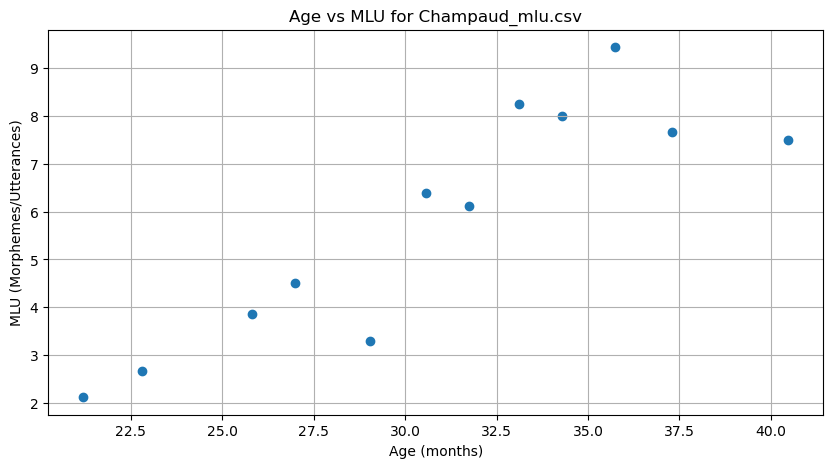

Spearman's rho for Champaud_mlu.csv: 0.8531

Chosen Transcripts for Champaud_mlu.csv: 
 ['010906x.cha', '011024x.cha', '020124x.cha', '020300x.cha', '020501.cha', '020617x.cha', '020722x.cha', '020903x.cha', '021009x.cha', '021122x.cha', '030109x.cha', '030414x.cha'] 

MLU Scores for Champaud_mlu.csv: 
 [2.125, 2.667, 3.857, 4.5, 3.307, 6.391, 6.125, 8.25, 8.0, 9.429, 7.667, 7.5] 

Ages for Champaud_mlu.csv: 
 [21.2, 22.8, 25.8, 27.0, 29.03333333333333, 30.566666666666666, 31.733333333333334, 33.1, 34.3, 35.733333333333334, 37.3, 40.46666666666667] 

Time Steps for Champaud_mlu.csv: 
 [1.6000000000000014, 3.0, 1.1999999999999993, 2.0333333333333314, 1.533333333333335, 1.1666666666666679, 1.3666666666666671, 1.1999999999999957, 1.4333333333333371, 1.5666666666666629, 3.1666666666666714] 



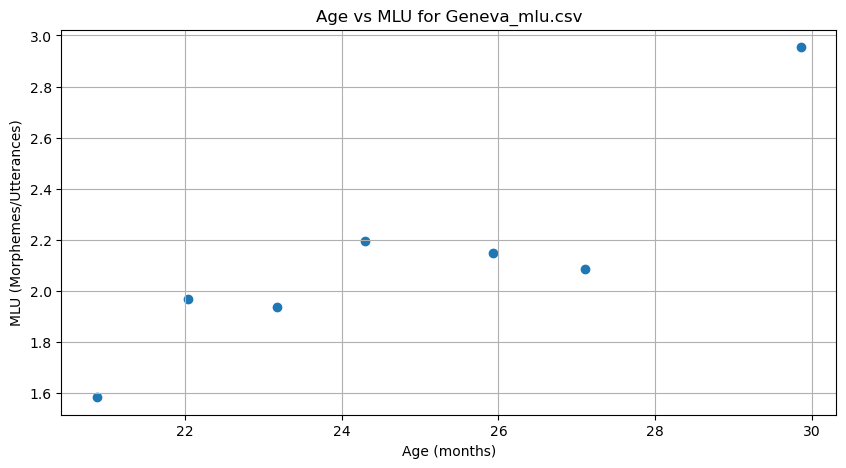

Spearman's rho for Geneva_mlu.csv: 0.8214

Chosen Transcripts for Geneva_mlu.csv: 
 ['010826.cha', '011001.cha', '011105.cha', '020009.cha', '020128.cha', '020303.cha', '020526.cha'] 

MLU Scores for Geneva_mlu.csv: 
 [1.584, 1.967, 1.937, 2.194, 2.148, 2.085, 2.954] 

Ages for Geneva_mlu.csv: 
 [20.866666666666667, 22.03333333333333, 23.166666666666664, 24.3, 25.933333333333334, 27.1, 29.866666666666667] 

Time Steps for Geneva_mlu.csv: 
 [1.1666666666666643, 1.1333333333333329, 1.1333333333333364, 1.6333333333333329, 1.1666666666666679, 2.7666666666666657] 



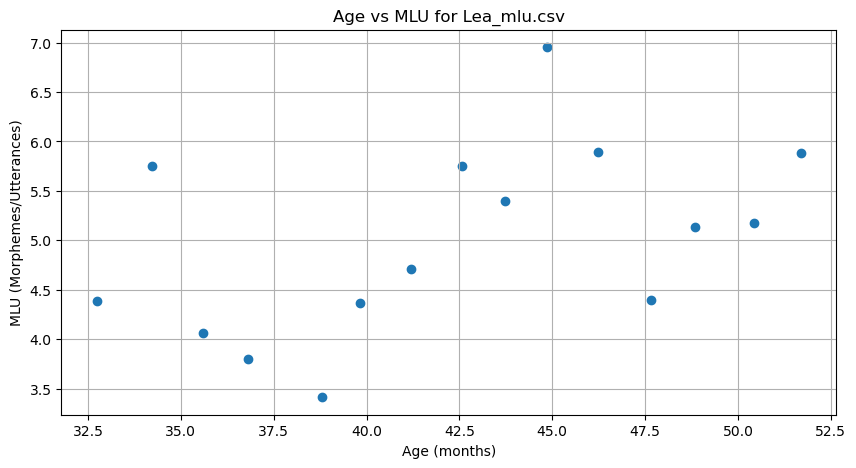

Spearman's rho for Lea_mlu.csv: 0.5321

Chosen Transcripts for Lea_mlu.csv: 
 ['020822.cha', '021007.cha', '021118.cha', '030024.cha', '030224.cha', '030325.cha', '030506.cha', '030617.cha', '030722.cha', '030826.cha', '031007.cha', '031120.cha', '040025.cha', '040213.cha', '040321.cha'] 

MLU Scores for Lea_mlu.csv: 
 [4.385, 5.749, 4.06, 3.802, 3.412, 4.367, 4.707, 5.755, 5.394, 6.954, 5.893, 4.392, 5.135, 5.177, 5.884] 

Ages for Lea_mlu.csv: 
 [32.733333333333334, 34.233333333333334, 35.6, 36.8, 38.8, 39.833333333333336, 41.2, 42.56666666666666, 43.733333333333334, 44.86666666666667, 46.233333333333334, 47.666666666666664, 48.833333333333336, 50.43333333333334, 51.7] 

Time Steps for Lea_mlu.csv: 
 [1.5, 1.3666666666666671, 1.1999999999999957, 2.0, 1.0333333333333385, 1.3666666666666671, 1.36666666666666, 1.1666666666666714, 1.1333333333333329, 1.3666666666666671, 1.43333333333333, 1.1666666666666714, 1.6000000000000014, 1.2666666666666657] 



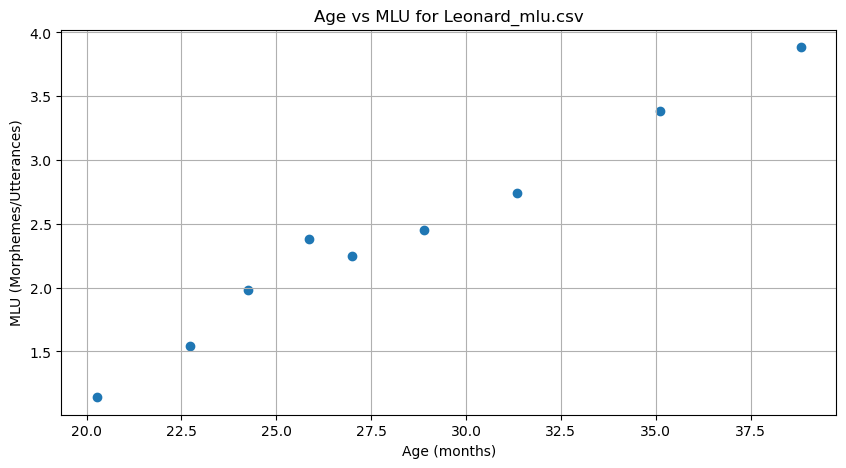

Spearman's rho for Leonard_mlu.csv: 0.9833

Chosen Transcripts for Leonard_mlu.csv: 
 ['010808.cha', '011022.cha', '020008.cha', '020126.cha', '020300.cha', '020427.cha', '020710.cha', '021103.cha', '030225.cha'] 

MLU Scores for Leonard_mlu.csv: 
 [1.141, 1.54, 1.981, 2.384, 2.251, 2.455, 2.742, 3.384, 3.884] 

Ages for Leonard_mlu.csv: 
 [20.266666666666666, 22.733333333333334, 24.266666666666666, 25.866666666666667, 27.0, 28.9, 31.333333333333332, 35.1, 38.833333333333336] 

Time Steps for Leonard_mlu.csv: 
 [2.4666666666666686, 1.5333333333333314, 1.6000000000000014, 1.1333333333333329, 1.8999999999999986, 2.4333333333333336, 3.7666666666666693, 3.7333333333333343] 



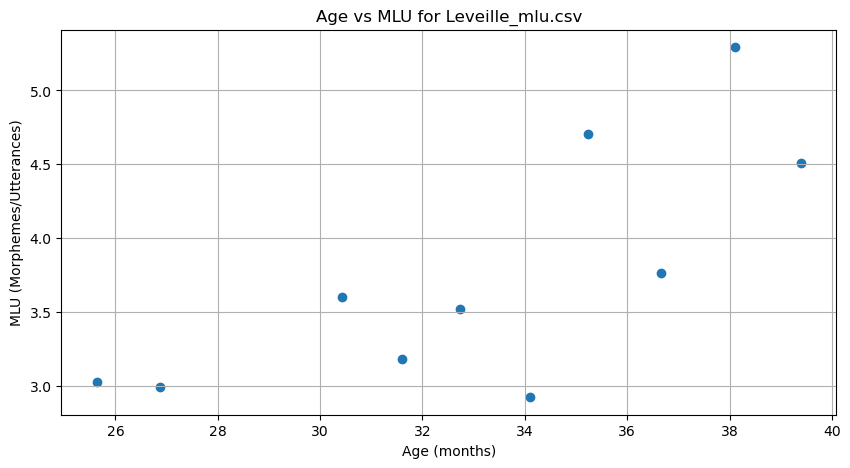

Spearman's rho for Leveille_mlu.csv: 0.7091

Chosen Transcripts for Leveille_mlu.csv: 
 ['020119.cha', '020226.cha', '020613.cha', '020718.cha', '020822.cha', '021003.cha', '021107.cha', '030020.cha', '030203.cha', '030312.cha'] 

MLU Scores for Leveille_mlu.csv: 
 [3.022, 2.993, 3.601, 3.18, 3.52, 2.921, 4.706, 3.762, 5.293, 4.505] 

Ages for Leveille_mlu.csv: 
 [25.633333333333333, 26.866666666666667, 30.433333333333334, 31.6, 32.733333333333334, 34.1, 35.233333333333334, 36.666666666666664, 38.1, 39.4] 

Time Steps for Leveille_mlu.csv: 
 [1.2333333333333343, 3.5666666666666664, 1.1666666666666679, 1.1333333333333329, 1.3666666666666671, 1.1333333333333329, 1.43333333333333, 1.4333333333333371, 1.2999999999999972] 



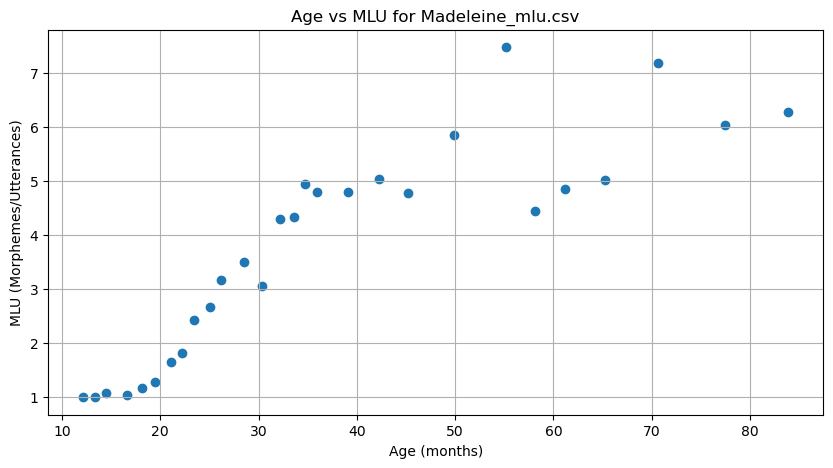

Spearman's rho for Madeleine_mlu.csv: 0.9479

Chosen Transcripts for Madeleine_mlu.csv: 
 ['010005.cha', '010110.cha', '010214.cha', '010418.cha', '010604.cha', '010715.cha', '010903.cha', '011007.cha', '011113.cha', '020102.cha', '020206.cha', '020415.cha', '020610.cha', '020805.cha', '020916.cha', '021020.cha', '030028.cha', '030302.cha', '030608.cha', '030907.cha', '040127.cha', '040704.cha', '041003.cha', '050105.cha', '050508.cha', '051018.cha', '060504.cha', '061126.cha'] 

MLU Scores for Madeleine_mlu.csv: 
 [1.0, 1.0, 1.071, 1.038, 1.167, 1.282, 1.647, 1.811, 2.425, 2.68, 3.165, 3.496, 3.059, 4.298, 4.343, 4.948, 4.809, 4.793, 5.042, 4.785, 5.861, 7.483, 4.452, 4.856, 5.015, 7.189, 6.04, 6.283] 

Ages for Madeleine_mlu.csv: 
 [12.166666666666666, 13.333333333333334, 14.466666666666667, 16.566666666666666, 18.133333333333333, 19.5, 21.1, 22.233333333333334, 23.433333333333334, 25.066666666666666, 26.2, 28.5, 30.333333333333332, 32.166666666666664, 33.56666666666666, 34.7, 35.9, 

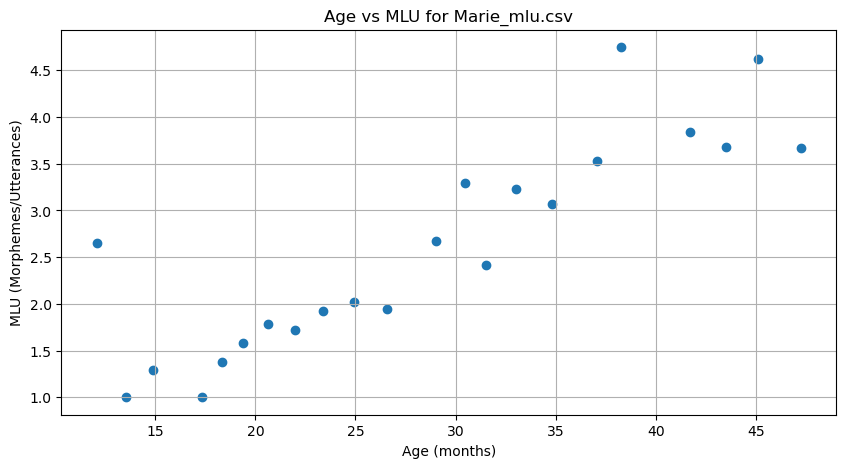

Spearman's rho for Marie_mlu.csv: 0.8896

Chosen Transcripts for Marie_mlu.csv: 
 ['10002.cha', '10116a.cha', '10227a.cha', '10510a.cha', '10610a.cha', '10712a.cha', '10819a.cha', '11000a.cha', '11111a.cha', '20028a.cha', '20217a.cha', '20501a.cha', '20614a.cha', '20716a.cha', '20900a.cha', '21024a.cha', '30102a.cha', '30208a.cha', '30521a.cha', '30716a.cha', '30904a.cha', '31108a.cha'] 

MLU Scores for Marie_mlu.csv: 
 [2.652, 1.0, 1.292, 1.0, 1.379, 1.578, 1.788, 1.719, 1.921, 2.015, 1.95, 2.675, 3.294, 2.412, 3.225, 3.073, 3.531, 4.748, 3.839, 3.681, 4.626, 3.674] 

Ages for Marie_mlu.csv: 
 [12.066666666666666, 13.533333333333333, 14.9, 17.333333333333332, 18.333333333333332, 19.4, 20.633333333333333, 22.0, 23.366666666666667, 24.933333333333334, 26.566666666666666, 29.03333333333333, 30.46666666666667, 31.53333333333333, 33.0, 34.8, 37.06666666666667, 38.266666666666666, 41.7, 43.53333333333333, 45.13333333333333, 47.266666666666666] 

Time Steps for Marie_mlu.csv: 
 [1.4666666666

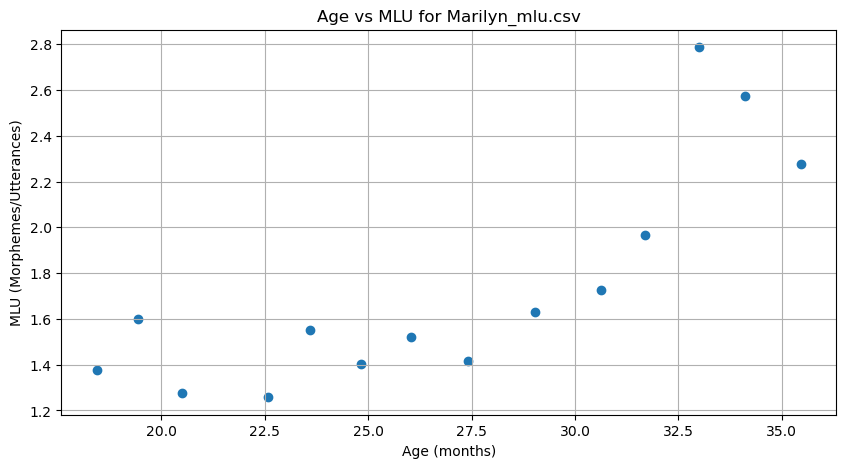

Spearman's rho for Marilyn_mlu.csv: 0.8330

Chosen Transcripts for Marilyn_mlu.csv: 
 ['10613a.cha', '10703b.cha', '10815a.cha', '11017a.cha', '11118a.cha', '20025a.cha', '20201a.cha', '20312a.cha', '20501a.cha', '20619a.cha', '20721a.cha', '20900a.cha', '21003a.cha', '21114a.cha'] 

MLU Scores for Marilyn_mlu.csv: 
 [1.378, 1.6, 1.275, 1.258, 1.552, 1.402, 1.52, 1.417, 1.632, 1.728, 1.966, 2.787, 2.574, 2.276] 

Ages for Marilyn_mlu.csv: 
 [18.433333333333334, 19.433333333333334, 20.5, 22.566666666666666, 23.6, 24.833333333333332, 26.03333333333333, 27.4, 29.03333333333333, 30.633333333333333, 31.7, 33.0, 34.1, 35.46666666666667] 

Time Steps for Marilyn_mlu.csv: 
 [1.0, 1.0666666666666664, 2.0666666666666664, 1.033333333333335, 1.2333333333333307, 1.1999999999999993, 1.3666666666666671, 1.6333333333333329, 1.6000000000000014, 1.0666666666666664, 1.3000000000000007, 1.1000000000000014, 1.3666666666666671] 



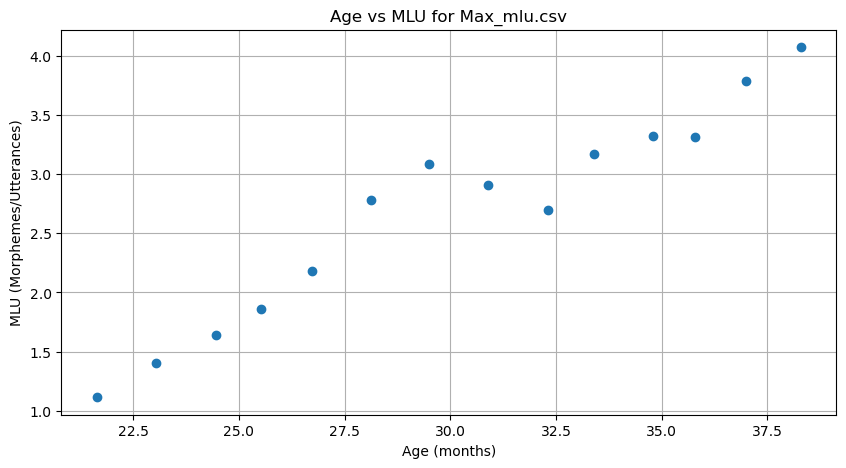

Spearman's rho for Max_mlu.csv: 0.9648

Chosen Transcripts for Max_mlu.csv: 
 ['010919.cha', '011101.cha', '020014.cha', '020116.cha', '020222.cha', '020404.cha', '020515.cha', '020627.cha', '020809.cha', '020912.cha', '021024.cha', '021124.cha', '030100.cha', '030209.cha'] 

MLU Scores for Max_mlu.csv: 
 [1.115, 1.403, 1.638, 1.857, 2.184, 2.779, 3.083, 2.907, 2.692, 3.165, 3.32, 3.312, 3.789, 4.07] 

Ages for Max_mlu.csv: 
 [21.633333333333333, 23.03333333333333, 24.466666666666665, 25.53333333333333, 26.733333333333334, 28.133333333333333, 29.5, 30.9, 32.3, 33.4, 34.8, 35.8, 37.0, 38.3] 

Time Steps for Max_mlu.csv: 
 [1.3999999999999986, 1.4333333333333336, 1.0666666666666664, 1.2000000000000028, 1.3999999999999986, 1.3666666666666671, 1.3999999999999986, 1.3999999999999986, 1.1000000000000014, 1.3999999999999986, 1.0, 1.2000000000000028, 1.2999999999999972] 



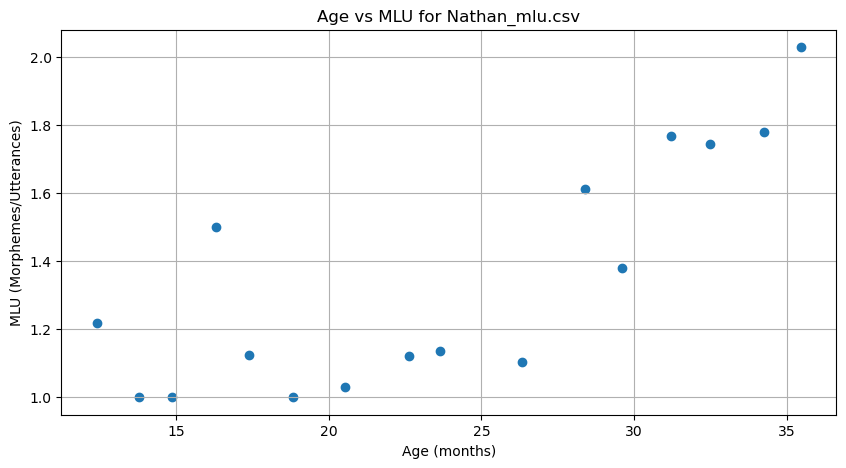

Spearman's rho for Nathan_mlu.csv: 0.7345

Chosen Transcripts for Nathan_mlu.csv: 
 ['10012a.cha', '10124a.cha', '10226a.cha', '10409a.cha', '10512a.cha', '10625a.cha', '10816a.cha', '11019a.cha', '11119a.cha', '20210a.cha', '20412a.cha', '20518a.cha', '20706a.cha', '20814a.cha', '21007a.cha', '21114a.cha'] 

MLU Scores for Nathan_mlu.csv: 
 [1.217, 1.0, 1.0, 1.5, 1.125, 1.0, 1.03, 1.122, 1.136, 1.102, 1.612, 1.38, 1.766, 1.744, 1.778, 2.028] 

Ages for Nathan_mlu.csv: 
 [12.4, 13.8, 14.866666666666667, 16.3, 17.4, 18.833333333333332, 20.53333333333333, 22.633333333333333, 23.633333333333333, 26.333333333333332, 28.4, 29.6, 31.2, 32.46666666666667, 34.233333333333334, 35.46666666666667] 

Time Steps for Nathan_mlu.csv: 
 [1.4000000000000004, 1.0666666666666664, 1.4333333333333336, 1.0999999999999979, 1.4333333333333336, 1.6999999999999993, 2.1000000000000014, 1.0, 2.6999999999999993, 2.0666666666666664, 1.2000000000000028, 1.5999999999999979, 1.2666666666666693, 1.7666666666666657, 1.2

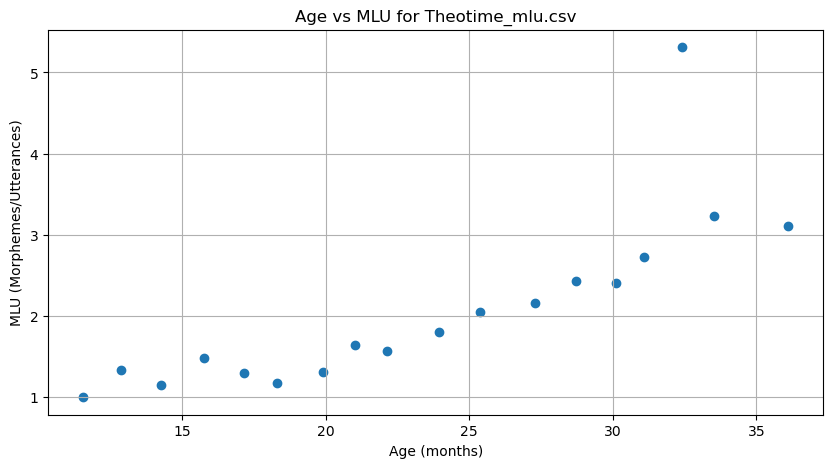

Spearman's rho for Theotime_mlu.csv: 0.9463

Chosen Transcripts for Theotime_mlu.csv: 
 ['01117a.cha', '10026a.cha', '10208a.cha', '10323a.cha', '10505a.cha', '10609a.cha', '10727a.cha', '10901a.cha', '11004a.cha', '11128a.cha', '20111a.cha', '20309a.cha', '20422a.cha', '20603a.cha', '20703a.cha', '20812a.cha', '20916a.cha', '30003a.cha'] 

MLU Scores for Theotime_mlu.csv: 
 [1.0, 1.333, 1.154, 1.489, 1.295, 1.181, 1.31, 1.639, 1.569, 1.798, 2.051, 2.157, 2.427, 2.404, 2.721, 5.311, 3.233, 3.107] 

Ages for Theotime_mlu.csv: 
 [11.566666666666666, 12.866666666666667, 14.266666666666666, 15.766666666666666, 17.166666666666668, 18.3, 19.9, 21.03333333333333, 22.133333333333333, 23.933333333333334, 25.366666666666667, 27.3, 28.733333333333334, 30.1, 31.1, 32.4, 33.53333333333333, 36.1] 

Time Steps for Theotime_mlu.csv: 
 [1.3000000000000007, 1.3999999999999986, 1.5, 1.4000000000000021, 1.1333333333333329, 1.5999999999999979, 1.1333333333333329, 1.1000000000000014, 1.8000000000000007, 1.4

ValueError: could not convert string to float: 'NA'

In [69]:
age_mlu_plots(mlu_files_all, spearman_rhos_all, age_files)

## Spearman's ρ

In [ ]:
spearman_rhos_50

In [ ]:
spearman_rhos_100

In [70]:
spearman_rhos_all

[['Anae_mlu.csv', 0.818119658119658],
 ['Anais_mlu.csv', 0.9519877365708246],
 ['Anne_mlu.csv', 0.961764705882353],
 ['Antoine_mlu.csv', 0.950714753219132],
 ['Champaud_mlu.csv', 0.8531468531468532],
 ['Geneva_mlu.csv', 0.8214285714285715],
 ['Lea_mlu.csv', 0.532142857142857],
 ['Leonard_mlu.csv', 0.9833333333333333],
 ['Leveille_mlu.csv', 0.709090909090909],
 ['Madeleine_mlu.csv', 0.9478582270233478],
 ['Marie_mlu.csv', 0.8895792503844412],
 ['Marilyn_mlu.csv', 0.832967032967033],
 ['Max_mlu.csv', 0.9648351648351648],
 ['Nathan_mlu.csv', 0.7345164700884433],
 ['Theotime_mlu.csv', 0.9463364293085655]]